In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error

In [48]:
df = pd.read_csv(r'C:\Users\Rich\Desktop\Adidas US Sales Datasets.csv')

In [49]:
df = df. drop(labels=[0,1], axis = 0)
df = df.reset_index(drop=True)
df.columns = df.iloc[0]
df = df.drop(labels=[0], axis=0)

In [50]:
df['Price per Unit'] = df['Price per Unit'].str.replace('$', '').str.strip()
df['Units Sold'] = df['Units Sold'].str.replace(',', '')
df['Total Sales'] = df['Total Sales'].str.replace('$', '').str.strip()
df['Operating Margin'] = df['Operating Margin'].str.replace('$', '').str.strip()
df['Operating Margin'] = df['Operating Margin'].str.replace('%', '', regex=True)
df['Total Sales'] = df['Total Sales'].str.replace(',', '', regex=True)
df['Price per Unit'] = df['Price per Unit'].str.replace(',', '', regex=True)
df[['Price per Unit','Units Sold','Total Sales','Operating Margin']]= df[['Price per Unit','Units Sold','Total Sales','Operating Margin']].astype(float)
df['Operating Profit'] = df['Operating Profit'].str.replace('$', '').str.strip()
df['Operating Profit'] = df['Operating Profit'].str.replace(',', '').str.strip()


C:\Users\Rich\AppData\Local\Temp\ipykernel_8816\2412584080.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Price per Unit'] = df['Price per Unit'].str.replace('$', '').str.strip()
C:\Users\Rich\AppData\Local\Temp\ipykernel_8816\2412584080.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Total Sales'] = df['Total Sales'].str.replace('$', '').str.strip()
C:\Users\Rich\AppData\Local\Temp\ipykernel_8816\2412584080.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Operating Margin'] = df['Operating Margin

In [51]:
df2 = df.copy()

PREDICTION MODEL 

In [52]:
df2['Region']=pd.factorize(df2.Region)[0]
df2['State']=pd.factorize(df2.State)[0]
df2['City']=pd.factorize(df2.City)[0]
df2['Product']=pd.factorize(df2.Product)[0]
df2['Retailer']=pd.factorize(df2.Retailer)[0]
df2.rename(columns = {'Sales Method':'Method'}, inplace = True)
df2['Method']=pd.factorize(df2.Method)[0]
df2 = df2.drop('Invoice Date',axis=1)
df2 = df2.drop('Retailer ID',axis=1)

In [53]:
df2['Units Sold'] = df2['Units Sold'].astype(int)
df2['Total Sales'] = df2['Total Sales'].astype(int)
df2['Operating Profit'] = df2['Operating Profit'].astype(int)
df2['Retailer'] = df2['Retailer'].astype(int)

In [54]:
X = df2.values[:, (0,1,2,3,4,5,6,8,9,10)]
Y = df2.values[:, 7]

SPLITTING TRAIN AND TEST DATASET

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [56]:
Model_dt = DecisionTreeRegressor(random_state=42)
Model_dt.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [57]:
y_pred_dt = Model_dt.predict(X_test)

In [58]:
r2_dt = r2_score(y_test,y_pred_dt)
r2_dt

0.9986512115879234

In [59]:
mse_dt = mean_squared_error(y_test,y_pred_dt)
mse_dt

25568608.50207254

In [60]:
mae_dt = mean_absolute_error(y_test,y_pred_dt)
mae_dt

956.5518134715026

In [61]:
Model_rfr = RandomForestRegressor(random_state=42)
Model_rfr.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [62]:
y_pred = Model_rfr.predict(X_test)

Text(0.5, 1.0, 'Model correlation scatterplot')

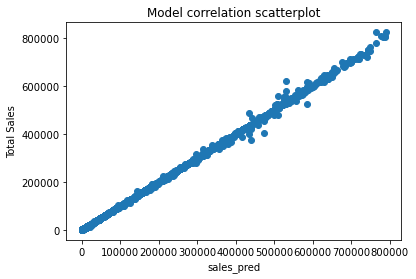

In [63]:
df2['sales_pred']= Model_rfr.predict(X)
plt.scatter(df2['sales_pred'],df2['Total Sales'])
plt.xlabel("sales_pred")
plt.ylabel("Total Sales")
plt.title('Model correlation scatterplot')

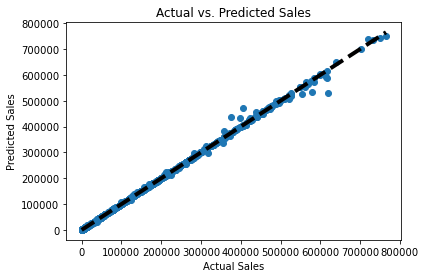

In [64]:
plt.scatter(y_test, y_pred)

# Add a diagonal line for reference
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)

# Set the plot title and axis labels
plt.title('Actual vs. Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')

# Show the plot
plt.show()